In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from ImportFunctions.DecisionTreeAlgorithm import (DecisionTreeAlgo, 
                                                   DecisionTreePredicitions, 
                                                   determine_type_of_feature)



## Random Forest Utilizes Bootstrapping to generate random samples

    -The first way in which this is implemented is by taking random row samples
    -The second way this is perfomed is using random features

In [2]:
from sklearn.datasets import load_wine

winedata = load_wine()
data = pd.DataFrame(winedata.data, columns=winedata.feature_names)
target = winedata.target
data['label'] = target

In [3]:
def train_test_split(data,test_size):

    test_size = round(test_size * len(data))
    
        
    indices = data.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    
    test_df = data.loc[test_indices]
    train_df = data.drop(test_indices)
    return train_df, test_df

0    0.331461
1    0.398876
2    0.269663
Name: label, dtype: float64

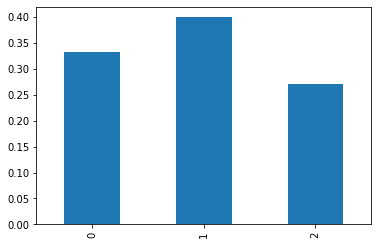

In [4]:
wineLabel = data['label'].value_counts(normalize=True)
wineLabel = wineLabel.sort_index()
wineLabel.plot(kind='bar')
wineLabel

In [5]:
random.seed(0)

train_df, test_df = train_test_split(data,0.2)

## Random Forest

In [6]:
def bootstrapping(train_df , n_boostrap):
    """
    n_bootstrap: how many examples we want to have in the dataset
    """
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_boostrap)
    
    df_bootsrapped = train_df.iloc[bootstrap_indices]
    
    
    
    """
    returns a random set of rows
    """
    return df_bootsrapped



    
    

In [7]:
def RandomForestAlgo(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    
    """
    n_trees: how many trees we want to build
    n_bootstrap: how many sample rows do we want
    n_features: how many sample features we want to include
    dt_max_depth: max depth of each decision tree
    
    """
    
    forest = []
    
    for i in range(n_trees):
        
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = DecisionTreeAlgo(df_bootstrapped,'classification', max_depth=dt_max_depth, random_subspace=n_features)
        
        forest.append(tree)
        
    
    return forest


In [21]:
def RandomForest_Prediction(test_df, forest):
    
    df_predictions = {}

    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = DecisionTreePredicitions(test_df, tree=forest[i])
        df_predictions[column_name] =  predictions

    df_predictions = pd.DataFrame(df_predictions)   
    random_forest_predictions = df_predictions.mode(axis=1)[0]

    return random_forest_predictions

In [37]:
accuracies= []

for i in range(20):

    forest = RandomForestAlgo(train_df, n_trees=10, n_bootstrap=70, n_features=4, dt_max_depth=4)
    rf_preds = RandomForest_Prediction(test_df, forest)
    Accuracy = pd.DataFrame({'Actual':test_df.iloc[:,-1], 'Predictions':rf_preds})
    Accuracy['Match'] = Accuracy['Actual'] == Accuracy['Predictions']
    accuracies.append(Accuracy['Match'].mean())
    
print(accuracies)
print("average accuracy: {}".format(np.array(accuracies).mean()))

[0.9444444444444444, 1.0, 0.9166666666666666, 0.9722222222222222, 0.9444444444444444, 0.9166666666666666, 0.9722222222222222, 0.9444444444444444, 1.0, 0.9722222222222222, 0.8888888888888888, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9166666666666666, 1.0, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222]
average accuracy: 0.9555555555555554


In [38]:
accuracies= []

for i in range(20):

    forest = RandomForestAlgo(train_df, n_trees=1, n_bootstrap=len(train_df), n_features=999, dt_max_depth=4)
    rf_preds = RandomForest_Prediction(test_df, forest)
    Accuracy = pd.DataFrame({'Actual':test_df.iloc[:,-1], 'Predictions':rf_preds})
    Accuracy['Match'] = Accuracy['Actual'] == Accuracy['Predictions']
    Accuracy['Match'].mean()
    accuracies.append(Accuracy['Match'].mean())

print(accuracies)
print("average accuracy: {}".format(np.array(accuracies).mean()))

[0.8055555555555556, 0.8333333333333334, 0.9444444444444444, 0.8055555555555556, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.9444444444444444, 0.9444444444444444, 0.8888888888888888, 0.9166666666666666, 0.8055555555555556, 0.8333333333333334, 0.9166666666666666, 0.7777777777777778, 0.9166666666666666, 0.8333333333333334, 0.7777777777777778, 0.9444444444444444, 0.9722222222222222]
average accuracy: 0.8722222222222223
